<a href="https://colab.research.google.com/github/wilberquito/AMLProject/blob/main/AMLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project: Image Classification
## Advanced Machine Learning


> Wilber E. Bermeo Quito 
>
> Judit Quintana Massana
>
> April 2023

## 

In [8]:
import zipfile
import torch
import matplotlib.pyplot as plt
from pathlib import Path

In [9]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [10]:
if IN_COLAB:
    ! pip install torchvision
    from google.colab import drive
    drive.mount('/content/drive')

    data_path = Path('/content/drive/MyDrive/AML/dataset_CIFAR10.zip')
    with zipfile.ZipFile(data_path,"r") as zip_ref:
        zip_ref.extractall("data")

    data_path = Path('/content/drive/MyDrive/AML/modular.zip')
    with zipfile.ZipFile(data_path,"r") as zip_ref:
        zip_ref.extractall(".")

In [11]:
import modular.datasets as datasets

train_transform, valid_transform = datasets.get_transforms(512)

train_transform, valid_transform

(Compose(
     Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
     RandomHorizontalFlip(p=0.5)
     RandomVerticalFlip(p=0.5)
     GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
     RandomRotation(degrees=[30.0, 70.0], interpolation=nearest, expand=False, fill=0)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [12]:
import modular.datasets as datasets

train_dataloader = datasets.get_dataloader(folder_root='data/train',
                                           transformer=train_transform,
                                           batch_size=32,
                                           suffle=True)
validate_dataloader = datasets.get_dataloader(folder_root='data/validation',
                                           transformer=train_transform,
                                           batch_size=32,
                                           suffle=False)

train_dataloader, validate_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x20c88ee0dc0>,
 <torch.utils.data.dataloader.DataLoader at 0x20c88e6d8b0>)

## Visualize images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


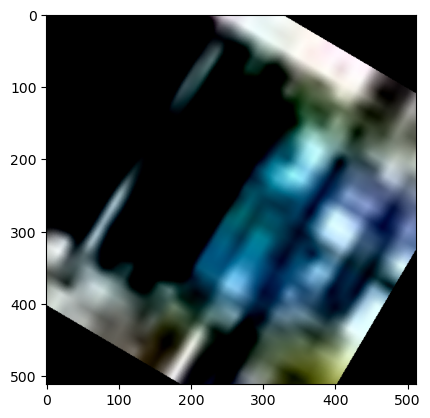

Label: 1
hola


In [15]:
import modular.utils as utils

#features, labels = next(iter(train_dataloader))
#features.size(), labels.size()

utils.show_dataset(train_dataloader)

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## AML Resnet50

In [ ]:
import modular.models as models

nn = models.AMLResnet50(out_dim=10)
nn = nn.to(device=device)

In [ ]:
from torchinfo import summary

batch_size = 16
img_size = models.get_img_size(model_id='amlresnet50')
summary(model=nn, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
AMLResnet50 (AMLResnet50)                     [32, 3, 232, 232]    [32, 10]             --                   Partial
├─ResNet (net)                                [32, 3, 232, 232]    [32, 2048]           --                   False
│    └─Conv2d (conv1)                         [32, 3, 232, 232]    [32, 64, 116, 116]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 116, 116]   [32, 64, 116, 116]   (128)                False
│    └─ReLU (relu)                            [32, 64, 116, 116]   [32, 64, 116, 116]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 116, 116]   [32, 64, 58, 58]     --                   --
│    └─Sequential (layer1)                    [32, 64, 58, 58]     [32, 256, 58, 58]    --                   False
│    │    └─Bottleneck (0)                    [32, 64, 58, 58]     [32, 256, 58,